In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout,Input,concatenate
from keras.optimizers import SGD
from keras import utils
from keras.datasets import cifar10

Using TensorFlow backend.


In [3]:
(trainX,trainY),(testX,testY)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
print('shape of trainX: ',trainX.shape,'shape of testX: ',testX.shape)
print('shape of trainY: ',trainY.shape,'shape of testY: ',testY.shape)

shape of trainX:  (50000, 32, 32, 3) shape of testX:  (10000, 32, 32, 3)
shape of trainY:  (50000, 1) shape of testY:  (10000, 1)


In [5]:
train_images = trainX
test_images = testX
train_labels = trainY
test_labels = testY

In [6]:
trainX = trainX / 255.0
testX = testX / 255.0
trainY = utils.to_categorical(trainY)
testY = utils.to_categorical(testY)

In [7]:
input_img = Input(shape = (32, 32, 3))

In [8]:
stem_1 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(input_img)
stem_1 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(stem_1)
stem_1 = MaxPooling2D((2,2))(stem_1)
stem_1 = Dropout(0.2)(stem_1)

stem_1 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(stem_1)
stem_1 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(stem_1)
stem_1 = MaxPooling2D((2,2))(stem_1)
stem_1 = Dropout(0.2)(stem_1)

In [9]:
stem_1 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(stem_1)
stem_1 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(stem_1)
stem_1 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(stem_1)
stem_1 = MaxPooling2D((2,2))(stem_1)
stem_1 = Dropout(0.2)(stem_1)

stem_1 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(stem_1)
stem_1 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(stem_1)
stem_1 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(stem_1)
stem_1 = MaxPooling2D((2,2))(stem_1)
stem_1 = Dropout(0.2)(stem_1)

stem_1 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(stem_1)
stem_1 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(stem_1)
stem_1 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(stem_1)
stem_1 = MaxPooling2D((2,2))(stem_1)
stem_1 = Dropout(0.2)(stem_1)

In [10]:
output = Flatten()(stem_1)
output = Dense(256,activation='relu',kernel_initializer='he_uniform')(output)

In [11]:
out = Dense(10,activation = 'softmax')(output)

In [12]:
model = Model(inputs = input_img, outputs = out)
opt = SGD(lr=0.01,momentum=0.9,decay = 0.01/100)
model.compile(optimizer=opt,metrics=['accuracy'],loss='categorical_crossentropy')

In [13]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        3692

In [14]:
history = model.fit(trainX,trainY,batch_size=250,epochs=100,validation_data=(testX,testY),verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 10s - loss: 2.2945 - accuracy: 0.1127 - val_loss: 2.2911 - val_accuracy: 0.1437
Epoch 2/100
 - 6s - loss: 2.0501 - accuracy: 0.2198 - val_loss: 1.8553 - val_accuracy: 0.2838
Epoch 3/100
 - 6s - loss: 1.7791 - accuracy: 0.3170 - val_loss: 1.6996 - val_accuracy: 0.3729
Epoch 4/100
 - 6s - loss: 1.6115 - accuracy: 0.3924 - val_loss: 1.4751 - val_accuracy: 0.4628
Epoch 5/100
 - 6s - loss: 1.4779 - accuracy: 0.4518 - val_loss: 1.4190 - val_accuracy: 0.4824
Epoch 6/100
 - 6s - loss: 1.3805 - accuracy: 0.4947 - val_loss: 1.2762 - val_accuracy: 0.5390
Epoch 7/100
 - 6s - loss: 1.2863 - accuracy: 0.5342 - val_loss: 1.1859 - val_accuracy: 0.5735
Epoch 8/100
 - 6s - loss: 1.2024 - accuracy: 0.5654 - val_loss: 1.1091 - val_accuracy: 0.5995
Epoch 9/100
 - 6s - loss: 1.1242 - accuracy: 0.5969 - val_loss: 1.0618 - val_accuracy: 0.6210
Epoch 10/100
 - 6s - loss: 1.0732 - accuracy: 0.6161 - val_loss: 1.0825 - val_accuracy: 0.6167
Epoch 11

Epoch 87/100
 - 6s - loss: 0.2664 - accuracy: 0.9070 - val_loss: 0.5735 - val_accuracy: 0.8374
Epoch 88/100
 - 6s - loss: 0.2676 - accuracy: 0.9073 - val_loss: 0.5887 - val_accuracy: 0.8291
Epoch 89/100
 - 6s - loss: 0.2644 - accuracy: 0.9084 - val_loss: 0.5681 - val_accuracy: 0.8391
Epoch 90/100
 - 6s - loss: 0.2607 - accuracy: 0.9095 - val_loss: 0.6155 - val_accuracy: 0.8335
Epoch 91/100
 - 6s - loss: 0.2626 - accuracy: 0.9081 - val_loss: 0.5626 - val_accuracy: 0.8391
Epoch 92/100
 - 6s - loss: 0.2608 - accuracy: 0.9094 - val_loss: 0.5920 - val_accuracy: 0.8332
Epoch 93/100
 - 6s - loss: 0.2553 - accuracy: 0.9116 - val_loss: 0.5777 - val_accuracy: 0.8366
Epoch 94/100
 - 6s - loss: 0.2525 - accuracy: 0.9122 - val_loss: 0.5798 - val_accuracy: 0.8381
Epoch 95/100
 - 6s - loss: 0.2503 - accuracy: 0.9121 - val_loss: 0.5894 - val_accuracy: 0.8360
Epoch 96/100
 - 6s - loss: 0.2467 - accuracy: 0.9133 - val_loss: 0.5853 - val_accuracy: 0.8365
Epoch 97/100
 - 6s - loss: 0.2444 - accuracy: 0.91

In [18]:
predictions = model.predict(testX)
class_label = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

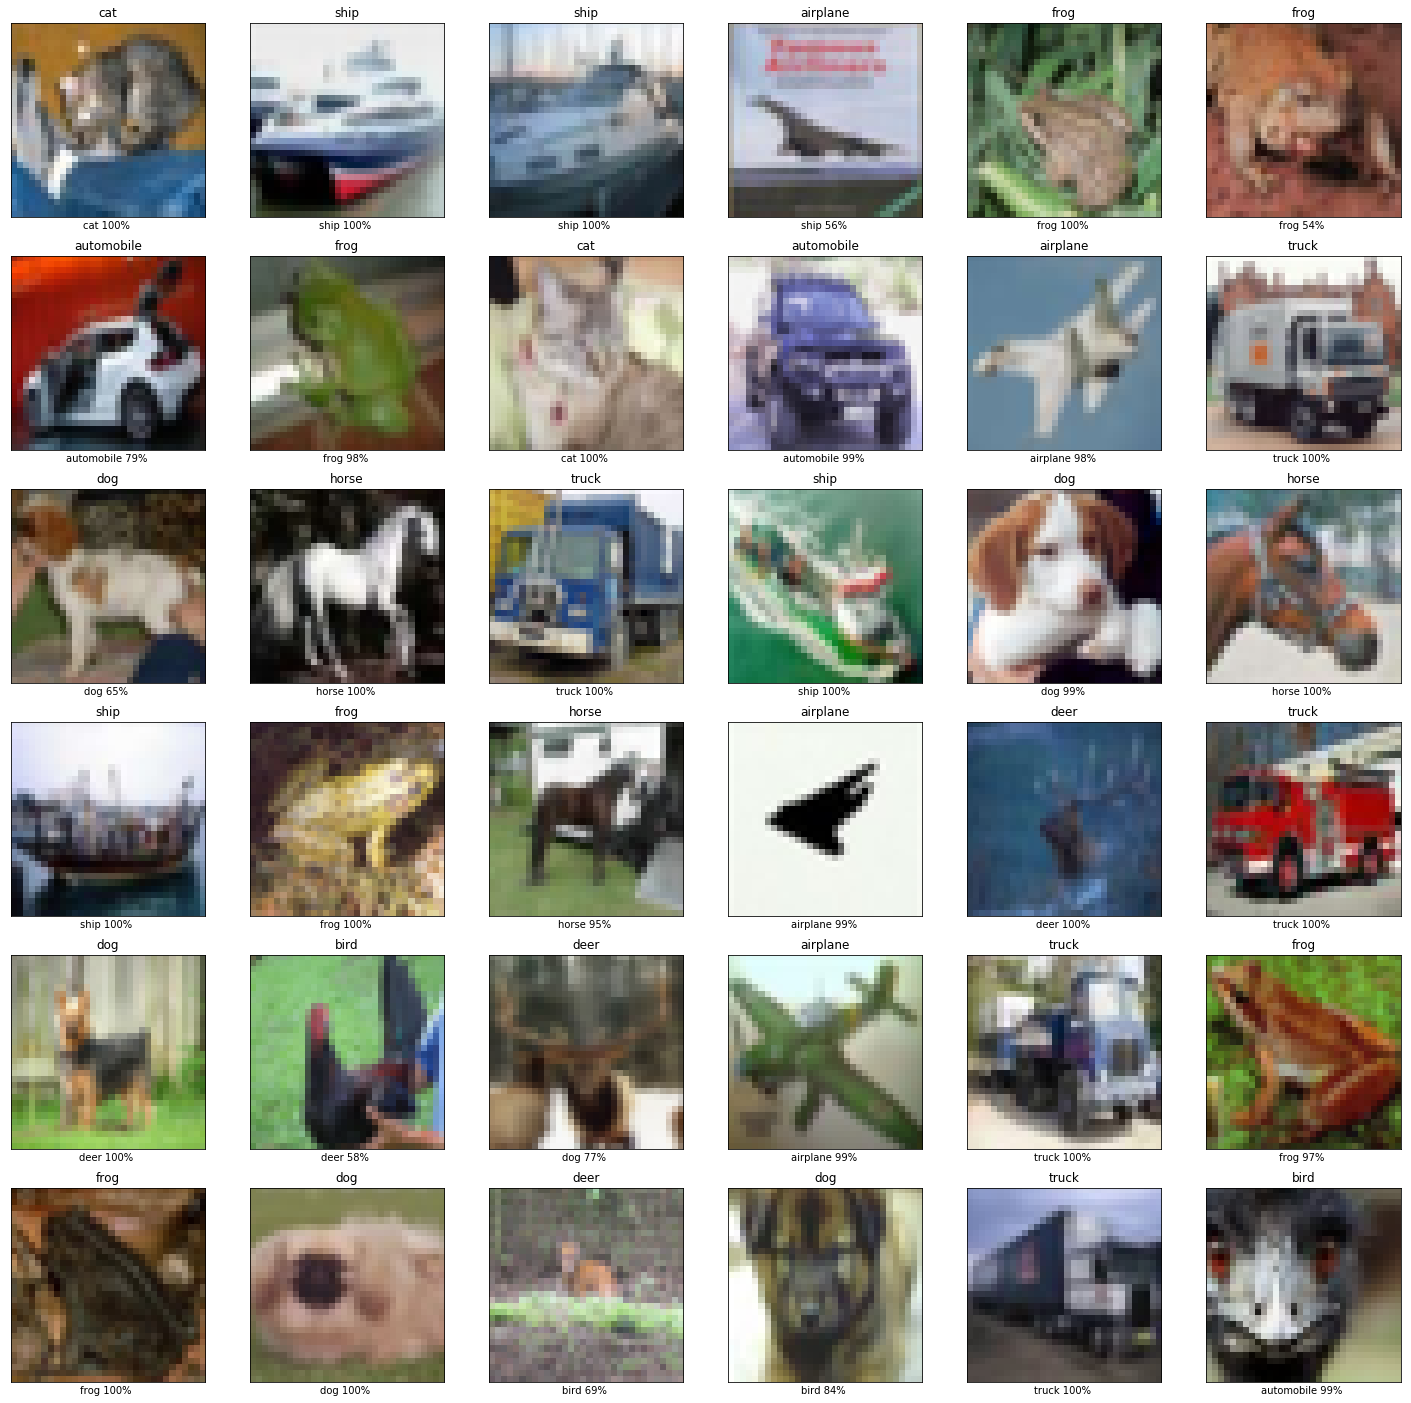

In [19]:
plt.figure(figsize=(25,25))

for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i])
    plt.xlabel("{} {:2.0f}% ".format(class_label[np.argmax(predictions[i])], 100*np.max(predictions[i])))
    plt.title(class_label[int(test_labels[i])])
plt.show()